In [12]:
import pandas as pd

data_df = pd.read_csv('./edit_data/10keywords_train.csv')

In [13]:
data_df.상황키워드.value_counts()

대인관계            10926
재정,은퇴,노후준비       7700
건강,죽음            7244
진로,취업,직장         5224
가족관계             4208
연애,결혼,출산         4085
대인관계(부부, 자녀)     3402
학업 및 진로          3283
학교폭력/따돌림         3091
직장, 업무 스트레스      2467
Name: 상황키워드, dtype: int64

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상황키워드   51630 non-null  object
 1   감정_대분류  51630 non-null  object
 2   사람문장    51630 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [15]:
data_df['사람문장'] = data_df['사람문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


C:\Users\ykh98\AppData\Local\Temp\ipykernel_8000\1986910390.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['사람문장'] = data_df['사람문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [16]:
data_df['사람문장'].head(10)

0    일은 왜 해도 해도 끝이 없을까 화가 난다 그냥 내가 해결하는 게 나아 남들한테 부...
1    이번 달에 또 급여가 깎였어 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나 최...
2    회사에 신입이 들어왔는데 말투가 거슬려 그런 애를 매일 봐야 한다고 생각하니까 스트...
3    직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜 일도 많은 데 정말 분하고 섭...
4    얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나 상사인 나에게 먼...
5    직장에 다니고 있지만 시간만 버리는 거 같아 진지하게 진로에 대한 고민이 생겨 직장...
6    성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔 나도 섭섭해 부모님께 좀 ...
7    퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고 더 좋은 회사가 기다리고 있을지...
8    졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어 응 느긋함...
9    요즘 직장생활이 너무 편하고 좋은 것 같아 우리 회사는 복지가 정말 좋아 내가 곧 ...
Name: 사람문장, dtype: object

# 1.  상황키워드 분류

In [17]:
emo_df = data_df

In [18]:
emo_target_df = emo_df['상황키워드']

In [19]:
emo_sentence_df = emo_df['사람문장']

In [20]:
emo_target_df.value_counts()

대인관계            10926
재정,은퇴,노후준비       7700
건강,죽음            7244
진로,취업,직장         5224
가족관계             4208
연애,결혼,출산         4085
대인관계(부부, 자녀)     3402
학업 및 진로          3283
학교폭력/따돌림         3091
직장, 업무 스트레스      2467
Name: 상황키워드, dtype: int64

In [21]:
type(emo_target_df)

pandas.core.series.Series

In [22]:
emo_df.loc[(emo_df['상황키워드']=='대인관계'), '상황키워드'] = 0
emo_df.loc[(emo_df['상황키워드']=='진로,취업,직장'), '상황키워드'] = 1
emo_df.loc[(emo_df['상황키워드']=='연애,결혼,출산'), '상황키워드'] = 2
emo_df.loc[(emo_df['상황키워드']=='가족관계'), '상황키워드'] = 3
emo_df.loc[(emo_df['상황키워드']=='대인관계(부부, 자녀)'), '상황키워드'] = 4
emo_df.loc[(emo_df['상황키워드']=='학업 및 진로'), '상황키워드'] = 5
emo_df.loc[(emo_df['상황키워드']=='학교폭력/따돌림'), '상황키워드'] = 6
emo_df.loc[(emo_df['상황키워드']=='재정,은퇴,노후준비'), '상황키워드'] = 7
emo_df.loc[(emo_df['상황키워드']=='직장, 업무 스트레스'), '상황키워드'] = 8
emo_df.loc[(emo_df['상황키워드']=='건강,죽음'), '상황키워드'] = 9

In [23]:
emo_target_df = emo_df['상황키워드']

In [24]:
emo_target_df.value_counts()

0    10926
7     7700
9     7244
1     5224
3     4208
2     4085
4     3402
5     3283
6     3091
8     2467
Name: 상황키워드, dtype: int64

In [25]:
from konlpy.tag import Okt
from tqdm import tqdm

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [27]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


In [28]:
okt = Okt()

In [29]:
tokenized_X_train = []

for sentence in tqdm(emo_df['사람문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_X_train.append(stopwords_removed_sentence)

100%|██████████| 51630/51630 [02:11<00:00, 393.60it/s]


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_X_train)

In [32]:
print(tokenizer.word_index)

{'을': 1, '내': 2, '것': 3, '있다': 4, '나': 5, '같다': 6, '너무': 7, '친구': 8, '보다': 9, '없다': 10, '않다': 11, '못': 12, '안': 13, '되다': 14, '좋다': 15, '싶다': 16, '말': 17, '에게': 18, '생각': 19, '이야': 20, '에서': 21, '수': 22, '사람': 23, '더': 24, '들다': 25, '게': 26, '만': 27, '받다': 28, '하고': 29, '일': 30, '모르다': 31, '자다': 32, '그렇다': 33, '돼다': 34, '한테': 35, '돈': 36, '나다': 37, '힘들다': 38, '고': 39, '해': 40, '다': 41, '가다': 42, '해보다': 43, '거': 44, '정말': 45, '로': 46, '때': 47, '남편': 48, '많이': 49, '마음': 50, '부모님': 51, '어떻다': 52, '아내': 53, '적': 54, '걱정': 55, '나르다': 56, '거야': 57, '아니다': 58, '회사': 59, '그': 60, '때문': 61, '이제': 62, '지금': 63, '슬프다': 64, '가족': 65, '요즘': 66, '먹다': 67, '응': 68, '많다': 69, '엄마': 70, '기분': 71, '집': 72, '자식': 73, '공부': 74, '오늘': 75, '우리': 76, '열심히': 77, '나이': 78, '아프다': 79, '난': 80, '야': 81, '다른': 82, '해주다': 83, '오다': 84, '결혼': 85, '스럽다': 86, '왜': 87, '얘기': 88, '살다': 89, '앞': 90, '혼자': 91, '맞다': 92, '인': 93, '주다': 94, '걸': 95, '준비': 96, '이번': 97, '일이': 98, '까지': 99, '몸': 100, '아들': 101, '랑': 102, '라고

In [33]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 14976
등장 빈도가 2번 이하인 희귀 단어의 수: 5832
단어 집합에서 희귀 단어의 비율: 38.94230769230769
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.489138013130644


In [34]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 9145


In [35]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(tokenized_X_train)
X_train = tokenizer.texts_to_sequences(tokenized_X_train)

In [36]:
import numpy as np

y_train = np.array(emo_target_df)

In [37]:
y_train

array([1, 1, 1, ..., 7, 0, 0], dtype=object)

최대 길이 : 99
평균 길이 : 29.99409258183227


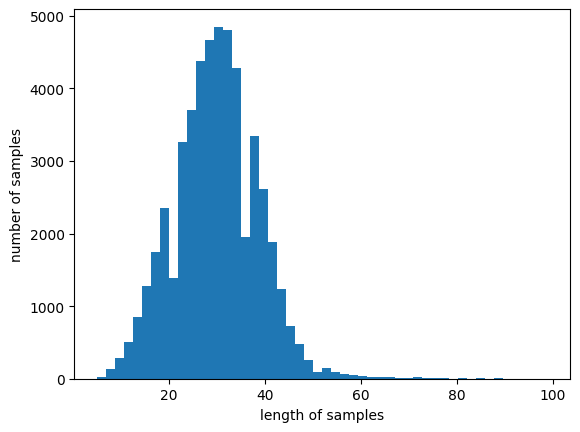

In [38]:
import matplotlib.pyplot as plt

print('최대 길이 :',max(len(review) for review in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [39]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [40]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 98.74297888824327


In [41]:
X_train = pad_sequences(X_train, maxlen=max_len)

In [42]:
len(y_train)

51630

In [43]:
len(X_train)

51630

In [44]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [45]:
y_train = y_train.astype(int)

In [46]:
pd.Series(y_train).value_counts()

0    10926
7     7700
9     7244
1     5224
3     4208
2     4085
4     3402
5     3283
6     3091
8     2467
dtype: int64

In [47]:
num = np.unique(y_train, axis=0)
num = num.shape[0]
one_hot_y_train = np.eye(num)[y_train]
one_hot_y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [93]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(10, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('./save_model_tmp/best_model(10keywords).h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, one_hot_y_train, epochs=50, callbacks=[es, mc], batch_size=128, validation_split=0.2)

Epoch 1/50
320/323 [============================>.] - ETA: 0s - loss: 1.5794 - acc: 0.4249
Epoch 1: val_acc improved from -inf to 0.47608, saving model to ./edit_data\best_model(10keywords).h5
323/323 [==============================] - 4s 9ms/step - loss: 1.5753 - acc: 0.4263 - val_loss: 1.6391 - val_acc: 0.4761
Epoch 2/50
323/323 [==============================] - ETA: 0s - loss: 0.8898 - acc: 0.6955
Epoch 2: val_acc improved from 0.47608 to 0.50813, saving model to ./edit_data\best_model(10keywords).h5
323/323 [==============================] - 3s 8ms/step - loss: 0.8898 - acc: 0.6955 - val_loss: 1.5700 - val_acc: 0.5081
Epoch 3/50
321/323 [============================>.] - ETA: 0s - loss: 0.7089 - acc: 0.7617
Epoch 3: val_acc improved from 0.50813 to 0.51617, saving model to ./edit_data\best_model(10keywords).h5
323/323 [==============================] - 3s 8ms/step - loss: 0.7096 - acc: 0.7614 - val_loss: 1.5874 - val_acc: 0.5162
Epoch 4/50
319/323 [============================>.] 

In [94]:
loaded_model = load_model('./save_model_tmp/best_model(10keywords).h5')

In [95]:
df = pd.DataFrame(loaded_model.history)

In [96]:
pd.DataFrame(history.history)

,loss,acc,val_loss,val_acc
0,1.575298,0.426278,1.639128,0.476080
1,0.889799,0.695526,1.569973,0.508135
2,0.709646,0.761403,1.587426,0.516173
3,0.613461,0.795565,1.694490,0.518788
4,0.541733,0.820017,1.707342,0.503971
5,0.486634,0.838902,1.693315,0.530602
6,0.439869,0.855946,1.911771,0.519659
7,0.399363,0.870376,1.978360,0.523049
8,0.360442,0.883595,2.023758,0.503389
9,0.332298,0.894708,2.142605,0.507166


In [97]:
import re

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(np.argmax(loaded_model.predict(pad_new), axis=-1)) # 예측
  if score == 0:
    print('대인관계')
  elif score == 1:
    print('진로,취업,직장')
  elif score == 2:
    print('연애,결혼,출산')
  elif score == 3:
    print('가족관계')
  elif score == 4:
    print('대인관계(부부, 자녀)')
  elif score == 5:
    print('학업 및 진로')
  elif score == 6:
    print('학교폭력/따돌림')
  elif score == 7:
    print('재정,은퇴,노후준비')
  elif score == 8:
    print('직장, 업무 스트레스')
  elif score == 9:
    print('건강,죽음')
  # print(f'score = {score}')

In [98]:
sentiment_predict('엄마가 밥먹으라고 했어')


1/1 [==============================] - 0s 192ms/step
가족관계


In [99]:
sentiment_predict('여자친구가 나한테 왜 그럴까?')

1/1 [==============================] - 0s 15ms/step
연애,결혼,출산


In [100]:
sentiment_predict('사는게 쉽지않아')

1/1 [==============================] - 0s 14ms/step
직장, 업무 스트레스


In [101]:
sentiment_predict('밥먹기가 귀찮아')

1/1 [==============================] - 0s 14ms/step
가족관계


In [102]:
sentiment_predict('나 진짜 죽을것 같은데')

1/1 [==============================] - 0s 17ms/step
건강,죽음


In [103]:
sentiment_predict('이 자식들이')

1/1 [==============================] - 0s 15ms/step
건강,죽음


In [104]:
sentiment_predict('나는 언제까지 살수 있을까')

1/1 [==============================] - 0s 14ms/step
직장, 업무 스트레스


In [105]:
sentiment_predict('죽는게 두려워')

1/1 [==============================] - 0s 12ms/step
건강,죽음


In [106]:
sentiment_predict('건강을 챙겨야하는데 잘 안돼 너무 걱정 끼치는 것 같은데 많이 힘들어해')

1/1 [==============================] - 0s 16ms/step
건강,죽음


In [107]:
sentiment_predict('치매 때문에 많이 힘들어해')

1/1 [==============================] - 0s 15ms/step
건강,죽음


In [108]:
sentiment_predict('종강은 언제오나')

1/1 [==============================] - 0s 15ms/step
학교폭력/따돌림


In [109]:
sentiment_predict('엘리베이터에 갇혔어')

1/1 [==============================] - 0s 15ms/step
건강,죽음


In [110]:
sentiment_predict('프로젝트 하고 있어')

1/1 [==============================] - 0s 16ms/step
직장, 업무 스트레스


In [111]:
sentiment_predict('엄마가 피부과 빨리 갔다오래')

1/1 [==============================] - 0s 14ms/step
가족관계


In [112]:
sentiment_predict('쉽지 않아')

1/1 [==============================] - 0s 16ms/step
학교폭력/따돌림


In [113]:
sentiment_predict('아이유랑 결혼하고싶어')

1/1 [==============================] - 0s 14ms/step
연애,결혼,출산


In [114]:
sentiment_predict('건강 때문에 앞으로 어떻게 살아가나 막막해')

1/1 [==============================] - 0s 15ms/step
건강,죽음


In [115]:
sentiment_predict('나 내일 군대가')

1/1 [==============================] - 0s 15ms/step
가족관계


In [116]:
sentiment_predict('선임이 괴롭혀')

1/1 [==============================] - 0s 14ms/step
학교폭력/따돌림


In [117]:
sentiment_predict('시끄러워 죽겠어')

1/1 [==============================] - 0s 15ms/step
건강,죽음


In [118]:
sentiment_predict('아 열받네')

1/1 [==============================] - 0s 16ms/step
건강,죽음


In [119]:
sentiment_predict('나 오늘 배신당했어')

1/1 [==============================] - 0s 14ms/step
학교폭력/따돌림


In [120]:
sentiment_predict('나 오늘 배신당했어')

1/1 [==============================] - 0s 19ms/step
학교폭력/따돌림


In [121]:
sentiment_predict('나의 삶이 얼마 안남았다는 것을 알게되어 슬퍼')

1/1 [==============================] - 0s 14ms/step
대인관계


In [122]:
sentiment_predict('너랑 나랑 사귄지 벌써 100일이야')

1/1 [==============================] - 0s 14ms/step
연애,결혼,출산


In [123]:
sentiment_predict('학교친구가 날 때려')

1/1 [==============================] - 0s 15ms/step
학교폭력/따돌림


In [124]:
sentiment_predict('스카이넷 초기모델이 나올거같은데')

1/1 [==============================] - 0s 13ms/step
대인관계


In [125]:
test_val_df = pd.read_csv('./edit_data/10keywords_validation.csv')

In [126]:
test_list = []
for sentence in tqdm(test_val_df['사람문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    test_list.append(stopwords_removed_sentence)

100%|██████████| 6641/6641 [00:21<00:00, 308.58it/s]


In [82]:
X_test = tokenizer.texts_to_sequences(test_list)
X_test = pad_sequences(X_test, maxlen=max_len)

In [83]:
y_pred = loaded_model.predict(X_test)

208/208 [==============================] - 1s 4ms/step


In [84]:
tmp = np.argmax(loaded_model.predict(X_test), axis=-1) # 예측


208/208 [==============================] - 1s 3ms/step


In [85]:
test_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상황키워드   6641 non-null   object
 1   감정_대분류  6641 non-null   object
 2   사람문장    6641 non-null   object
dtypes: object(3)
memory usage: 155.8+ KB


In [86]:
test_val_df['추정_상황키워드'] = pd.DataFrame(tmp)

In [87]:
test_val_df['추정_상황키워드'].value_counts()

9    1202
7     899
0     886
1     834
6     723
4     520
3     471
5     468
2     394
8     244
Name: 추정_상황키워드, dtype: int64

In [88]:
def num_to_emo(score):
    if score == 0:
        return '대인관계'
    elif score == 1:
        return '진로,취업,직장'
    elif score == 2:
        return '연애,결혼,출산'
    elif score == 3:
        return '가족관계'
    elif score == 4:
        return '대인관계(부부, 자녀)'
    elif score == 5:
        return '학업 및 진로'
    elif score == 6:
        return '학교폭력/따돌림'
    elif score == 7:
        return '재정,은퇴,노후준비'
    elif score == 8:
        return '직장, 업무 스트레스'
    elif score == 9:
        return '건강,죽음'

In [89]:
test_val_df['추정_상황키워드'] = test_val_df['추정_상황키워드'].apply(num_to_emo)

In [90]:
test_val_df.to_csv('./save_model_tmp/tmp_val_data(10keywords).csv', index=False)